In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
import pandas as pd

In [8]:
with open('cars_data.json', 'r') as f:
    cars = json.load(f)
df = pd.DataFrame(cars)

KM_PER_LITER_PER_MILES_PER_GALLON = 0.425144

df['kpl'] = df['Miles_per_Gallon'] * KM_PER_LITER_PER_MILES_PER_GALLON

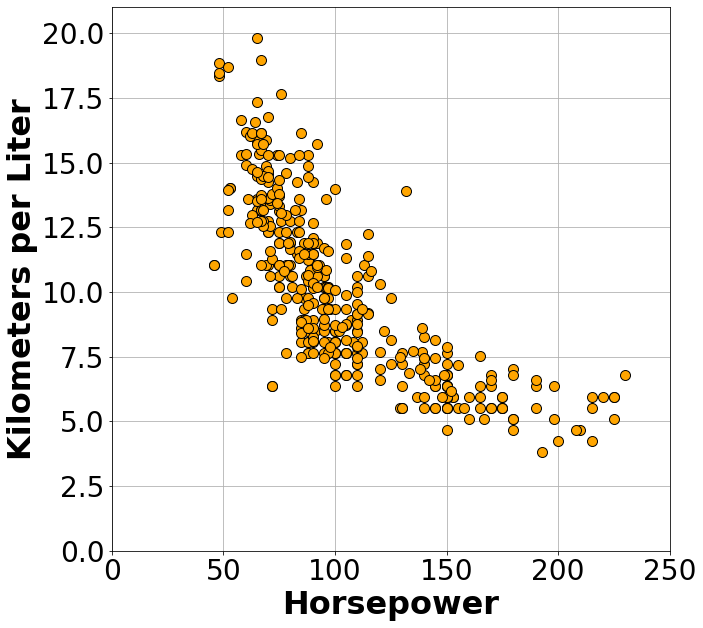

In [42]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(df['Horsepower'], df['kpl'], marker='o', linestyle='', markersize=10, color='orange', markeredgecolor='black')
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)
ax.set_ylabel('Kilometers per Liter', fontsize=32, fontweight='bold')
ax.set_xlabel('Horsepower', fontsize=32, fontweight='bold')
ax.grid('both')
ax.set_ylim([0, 21])
ax.set_xlim([0, 250])
plt.savefig('../tmp/cars_data.png', bbox_inches='tight')

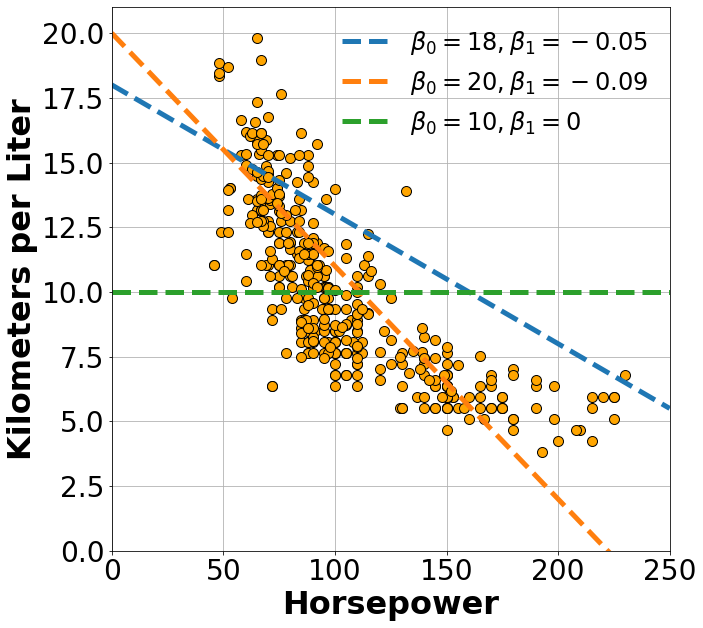

In [43]:
hp = np.linspace(0, 250)
lines = [
    18 - 0.05*hp,
    20 - 0.09*hp,
    10 + 0.0000*hp
]
labels = [
    (r'$\beta_0 = 18, \beta_1=-0.05$'),
    (r'$\beta_0 = 20, \beta_1=-0.09$'),
    (r'$\beta_0 = 10, \beta_1=0$'),
]

f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(df['Horsepower'], df['kpl'], marker='o', linestyle='', markersize=10, color='orange', markeredgecolor='black')
for line, label in zip(lines, labels):
    ax.plot(hp, line, linewidth=5, linestyle='--', label=label)
ax.legend(fontsize=24, frameon=False)
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)
ax.set_ylabel('Kilometers per Liter', fontsize=32, fontweight='bold')
ax.set_xlabel('Horsepower', fontsize=32, fontweight='bold')
ax.grid('both')
ax.set_ylim([0, 21])
ax.set_xlim([0, 250])
plt.savefig('../tmp/cars_data.png', bbox_inches='tight')